<a href="https://colab.research.google.com/github/samsonadmin/kickstart-jetson/blob/master/YOLOv4_Tiny_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)## Running a YOLOv4-Tiny Object Detector with Darknet in the Cloud! (GPU ENABLED)
This tutorial will help you build YOLOv4 easily in the cloud with GPU enabled so that you can run object detections in milliseconds!

# Step 1: Enabling GPU within your notebook
You will want to enable GPU acceleration within your Colab notebook so that your YOLOv4 system will be able to process detections over 100 times faster than CPU.

### Steps:

### i) Click **Edit** at top left of your notebook
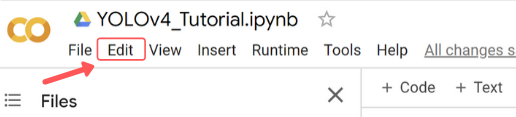
### ii) Click **Notebook Settings** within dropdown
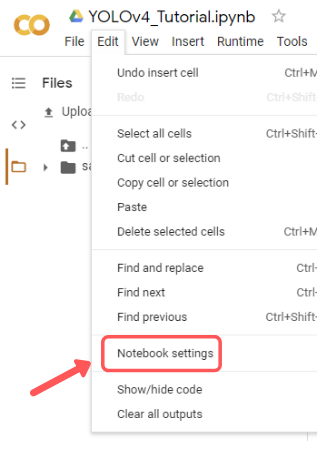
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**
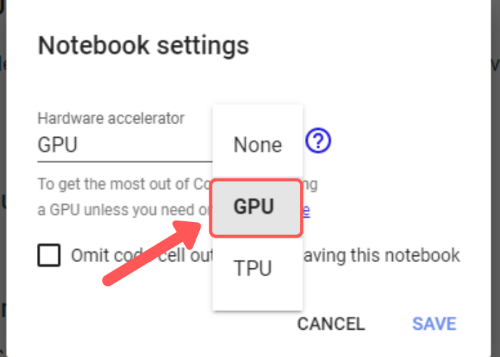

Your notebook should now have GPU enabled!

# Colab與本地端的路徑保持一致

如果我們把本地端的環境配置得和雲端的 Colab 一樣，就可以在本地端先產生需要的 dataset 和設定檔後，上傳 Google Drive 直接在 Colab 上訓練，這樣自由切換在 Colab 或本地端訓練或執行，可以增加兩者併用的方便性。

所謂環境的一致指的是 Colab 和本地端的檔案路徑。當 Colab map 到 Google Drive 的資料夾後，我們可以用 soft link 的方式，將它指向另一個 path，來讓這個 path 與本地端的 path 格式一樣；舉例來說，本地端的 dataset path 為 //mydrive，Colab 存取 Google Drive dataset 的 path 也是 /mydrive。

預設 Google Drive mount 到 Colab 的 path 為 /content/gdrive/My Drive，但我們使用下面第三行的 ln -s 將 /mydrive 指向 /content/gdrive/My Drive，

在 Colab 端執行：



```
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

!ln -s '/content/gdrive/My Drive/space_Colab' /mydrive
```



# Step 2: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [ ]:
import os
import os.path
 
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
 


In [ ]:
!ls /content/gdrive

!ln -s /content/gdrive/My\ Drive/space_Colab /
!ls /space_Colab

#%cd "/content/gdrive/My Drive/space_Colab"
%cd /space_Colab

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

import tensorflow as tf
tf.test.gpu_device_name()

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

!nproc


# Configuring cuDNN on Colab for YOLOv4


In [ ]:
%cd /space_Colab

if os.path.isfile('/space_Colab/cudnn-10.1-linux-x64-v7.6.5.32.tgz') == False:
	!wget http://www.mail2you.net/downloads/cudnn-10.1-linux-x64-v7.6.5.32.tgz
else:
	print("Already downloaded")

#we are installing the cuDNN that we dropped in our google drive
%cd /usr/local/

!tar -xzvf "/space_Colab/cudnn-10.1-linux-x64-v7.6.5.32.tgz"

!chmod a+r /usr/local/cuda/include/cudnn.h
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

!ls

#check the cv2 version, another key component of darknet
import cv2
cv2.__version__

#double check the cuDNN install
!nvcc -V


In [ ]:

%cd /space_Colab/

#remove old version
#%rm -rf darknet

if os.path.isdir("/space_Colab/darknet") == False:

  %cd /space_Colab/
  !git clone https://github.com/AlexeyAB/darknet

  # change makefile to have GPU and OPENCV enabled
  %cd darknet
  !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
  !sed -i 's/GPU=0/GPU=1/' Makefile
  !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
  !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile  

  # make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
  !make -j2
else:
  print("Already existing Darknet")
  !chmod 755 /space_Colab/darknet -R

!ls /space_Colab/darknet 



# Step 3: Download pre-trained YOLOv4-Tiny weights
YOLOv4-Tiny has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv4-Tiny on these pretrained classes and get detections.

Ref: https://github.com/AlexeyAB/darknet/issues/3114#issuecomment-494148968

In [ ]:
%cd /space_Colab/darknet

if os.path.isfile('yolov4-tiny.weights') == False:
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights
  #!wget http://www.mail2you.net/weights/yolov4-tiny.weights
else:
  print("Already downloaded")


if os.path.isfile('yolov4-tiny.conv.29') == False:
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29
  #!wget http://www.mail2you.net/weights/yolov4-tiny.conv.29
else:
  print("Already downloaded")


if os.path.isfile('yolov4.weights') == False:
  !wget http://www.mail2you.net/weights/yolov4.weights
else:
  print("Already downloaded")

#currently strongest yolo_v3_tiny_pan3.cfg.txt
#below the for yolov3-tiny

#if os.path.isfile('yolo_v3_tiny_pan3_aa_ae_mixup_scale_giou_dropblock_mosaic.cfg.txt') == False:
#  !wget http://www.mail2you.net/weights/yolo_v3_tiny_pan3_aa_ae_mixup_scale_giou_dropblock_mosaic.cfg.txt
#else:
##  print("Already downloaded")
##
##if os.path.isfile('yolov3-tiny.conv.11') == False:
#  !wget http://www.mail2you.net/weights/yolov3-tiny.conv.11
#else:
##  print("Already downloaded")  
##
##if os.path.isfile('yolov3-tiny-prn.cfg') == False:
#  !wget https://raw.githubusercontent.com/WongKinYiu/PartialResidualNetworks/master/cfg/yolov3-tiny-prn.cfg
#else:
##  print("Already downloaded")  
##
###!wget http://www.mail2you.net/weights/yolov3-tiny.weights#

#if os.path.isfile('yolov3-tiny-prn.cfg') == False:
#  !wget http://www.mail2you.net/weights/yolov3-tiny-prn.cfg
#else:
##  print("Already downloaded")  
##
##if os.path.isfile('yolov3-tiny-prn.weights') == False:
#  !wget http://www.mail2you.net/weights/yolov3-tiny-prn.weights
#else:
##  print("Already downloaded")  
##



# Step 4: Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Step 5: Run Your Detections with Darknet and YOLOv4-Tiny!
Darknet is now built and ready to run detections using YOLOv4-Tiny in the cloud! You can find out which sorts of classes the pre-trained YOLOv4-Tiny weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>
```
Darknet comes with a few images already installed in the darknet/data/ folder.

**Note:** After running detections OpenCV can't open the image instantly in the cloud so we must run: 
```bash
imShow('predictions.jpg')
```
This will output the image with the detections shown. The most recent detections are always saved to 'predictions.jpg'

Try out the examples below for yourself!

In [ ]:
!chmod 755 /space_Colab/darknet -R
%cd /space_Colab/darknet

!rm predictions.jpg
# run darknet detection on test images
#!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

!./darknet detector test cfg/coco.data cfg/yolov4-tiny.cfg yolov4-tiny.weights data/person.jpg -dont_show -ext_output

#!./darknet detector test cfg/coco.data yolov3-tiny-prn.cfg yolov3-tiny-prn.weights data/person.jpg -dont_show
#!./darknet detector test cfg/coco.data cfg/yolov3-tiny.cfg yolov3-tiny.weights data/person.jpg -dont_show

# show image using our helper function
imShow('predictions.jpg')

In [ ]:
# show image using our helper function
imShow('predictions.jpg')



In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

# (Optional)Step 6 :Using Google Drive Files to perform inference
You may want to run detections on more than just the images within the darknet/data/ folder. This step will show you how to upload local or Google Drive files to the cloud VM and run detections on them!

###Google Drive
Images can also be uploaded from your Google Drive and easily have YOLOv3-Tiny detections run on them.

You will want to run the below cell to mount your google drive into the cloud VM so that you can access its contents. It is that easy!

**NOTE:** We will be creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

This means we are just creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'.

The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening!

Now you can run YOLOv4-Tiny with images from Google Drive using the darknet command:
```
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/<path to image>
```
I recommend saving images within a folder called 'images' at the root level of your Google Drive.

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
# cd back into the darknet folder to run detections
%cd darknet

In [ ]:
# run detections on image within your Google Drive!
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/horses.jpg -dont_show -ext_output
imShow('predictions.jpg')


!./darknet detector test cfg/coco.data cfg/yolov4-tiny.cfg yolov4-tiny.weights data/person.jpg -dont_show -ext_output
imShow('predictions.jpg')

### Download Files to Local Machine or Google Drive from Cloud VM
You can also easily download images from your cloud VM to save to your local machine or Google Drive. 

#### Method 1: Local Machine

You can do it easily by using our helper function 'download()' or by right clicking the image in the File Explorer on the left side of your notebook and hitting **Download**. Files will be saved to your *Downloads* folder.

This is useful if you want to download the **'predictions.jpg'** images that the object detector outputs. 

```
!cp <file to download> <destination to save file>
```
See example of each below!

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/images/detection1.jpg

# (Optional) Step 7: Running YOLOv4 on Video in the Cloud!

You can also run YOLOv4 object detections on video in your Google Colab VM. Follow the cells below to see how to run videos from your local machine or from your Google Drive! 

## (Optional) Local Machine Video
Here is how to upload video from local machine, run detector and then download video showing detections.

In [ ]:
# upload the video of your choosing! (Feel free to use the same video I do, it is in the Github repository)
upload()

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show test.mp4 -i 0 -out_filename results.avi

In [ ]:
# download the video with detections shown
download('results.avi')

## (Optional) Google Drive Video
Here is how to run detector on video stored in Google Drive and save video straight to Google drive as well!

**Note:** You will have to change the paths to where your video is stored within your Google Drive and to where you want the resulting video stored. I have a videos folder in the home directory of my Google Drive.

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /mydrive/videos/test.mp4 -i 0 -out_filename /mydrive/videos/results.avi

# (Optional) Step 8: Customize YOLOv4-Tiny with the different command line flags.
Darknet and YOLOv4-Tiny have a lot of command line flags you can add to your '!./darknet detector ...' to allow it to be customizeable and flexible.

I will show a few examples of these flags that you can take advantage of! Feel free to mix and match them together to customize your detections in any way you want.

## Threshold Flag
There is a flag '-thresh' you can use to add a threshold for confidences on the detections.  Only detections with a confidence level above the threshold you set will be returned.

In the example below we run darknet with YOLOv4-Tiny without a threshold on the test image dog.jpg. The image returns four detections, the lowest confidence being on the pottedplant with 33%.

If we add the '-thresh 0.5' flag this will only output three detections as now pottedplant falls below the threshold and is ignored. 

Check it out below!

In [ ]:
# this is ran without the threshold flag set
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
# same detections but ran with the threshold flag set to 0.5 (pottedplant is no longer detected!)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg -thresh 0.5
imShow('predictions.jpg')

## Output Bounding Box Coordinates
You can output bounding box coordinates for each detection with the flag '-ext_output'. This external outputs flag will give you a few extra details about each detection within an image.

Check it out below!

In [ ]:
# darknet run with external output flag to print bounding box coordinates
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -ext_output
imShow('predictions.jpg')

## (Optional) Don't Show Image
You can add the flag '-dont_show' to not have the image outputted after running darknet. This doesn't really affect anything when running in Colab as the image is unable to output properly straight from darknet anyways. However, by adding the -dont_show flag you will get rid of the following warning from showing.
```
Unable to init server: Could not connect: Connection refused

(predictions:1850): Gtk-WARNING **: 17:01:00.687: cannot open display:
```

This is an important flag to have when running darknet with YOLOv4 on video as it will suppress having the video shown.

In [ ]:
# running darknet with dont show flag set (no longer get warnings)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -dont_show

## (Optional) Step 9: Multiple Images at Once
YOLOv4 object detections can be run on multiple images at once. This is done through having a text file which has the paths to several images that you want to have the detector run on.

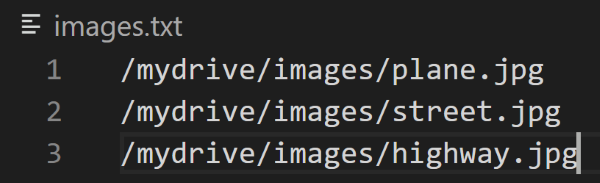

The .txt file should be in this format. One path to an image per line.

This file is stored to my Google Drive root directory and holds the path to three images within my Google Drive images folder.




## (Optional) Save Results to .JSON File
Here is an example of saving the multiple image detections to a .JSON file.

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output -dont_show -out result.json < /mydrive/images.txt

In [ ]:
download('result.json')

## (Optional) Saving Results to a .txt File
You can also save the results of running multiple images to a text file.

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -ext_output < /mydrive/images.txt > result.txt

In [ ]:
download('result.txt')

# ****Step 10. Preparing your data and configuration files 


In [ ]:
#Copy the data from google drive to VM for faster inference
!mkdir /training-data

if os.path.isdir("/training-data/face_mask") == False:
  !cp -R /space_Colab/face_mask /training-data

!ls /training-data/face_mask

# ****Step 11. Finally, Train your model!

When you execute the following command, your model will start training.

You will have a log line per epoch. On each iteration you will see how your training is going.

> **TRICK: Darknet copies a backup of your trained weights every 100 iterations. As magic, this file will be synced to your local drive on your computer, as well as the backups darknet do every 1000 iterations, saving it on a separate file.**


In [ ]:
#You run this the 1st time to start training your data

!chmod 755 /space_Colab/darknet -R
%cd /space_Colab/darknet/

!./darknet detector train "/training-data/face_mask/obj-google.data" "/training-data/face_mask/yolov4-tiny.cfg" "/space_Colab/darknet/yolov4-tiny.conv.29" -dont_show 




In [ ]:
#if it got disconnected, you continue training with this

!chmod 755 /space_Colab/darknet -R
%cd /space_Colab/darknet/

!./darknet detector train "/training-data/face_mask/obj-google.data" "/training-data/face_mask/yolov4-tiny.cfg" "/space_Colab/face_mask/yolov4-tiny_last.weights" -dont_show 

v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 37 Avg (IOU: 0.639573, GIOU: 0.618129), Class: 0.804178, Obj: 0.453155, No Obj: 0.002304, .5R: 0.894737, .75R: 0.263158, count: 38, class_loss = 3.365838, iou_loss = 14.231647, total_loss = 17.597485 
 total_bbox = 83705, rewritten_bbox = 0.058539 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 30 Avg (IOU: 0.589934, GIOU: 0.557869), Class: 0.872803, Obj: 0.242797, No Obj: 0.001059, .5R: 0.800000, .75R: 0.200000, count: 5, class_loss = 0.478532, iou_loss = 0.185232, total_loss = 0.663765 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 37 Avg (IOU: 0.682672, GIOU: 0.663345), Class: 0.773957, Obj: 0.397865, No Obj: 0.001864, .5R: 0.960000, .75R: 0.240000, count: 25, class_loss = 2.657470, iou_loss = 12.574769, total_loss = 15.232239 
 total_bbox = 83735, rewritten_bbox = 0.058518 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 30 Avg (IOU: 0.441708, GIOU: 0.361785), Class: 0.724733, Obj: 0.279191, No O

###[How to prevent Google Colab from disconnecting ?](https://medium.com/@shivamrawat_756/how-to-prevent-google-colab-from-disconnecting-717b88a128c0)




Ctrl+ Shift + i to open inspector view . Then goto console.


```
function ClickConnect(){
	console.log("Working");
	document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
}
setInterval(ClickConnect,60000)
```


